In [1]:
# imports 
%config InlineBackend.figure_format = 'retina'
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *


Populating the interactive namespace from numpy and matplotlib


In [2]:
def harmonic(n):
    return sum(1/arange(1,n+1))

def prob(x, B):
    b = B/2
    k = x - b
    return 1/b * (harmonic(b) - harmonic(b-k))

def E(n, B):
    return [x for x in range(int(B/2)+1, B+1) if n-x <= x]

def sample(N, B):
    samples = []
    for i in range(N):
        n = random.randint(B+1,B+B+1)
        E_n = E(n, B)
        samples.append(random.choice(E_n))
    return samples

In [20]:
# Normalized?
for B in range(10, 1000, 2):
    bases = range(int(B/2), B+1)
    s = sum([prob(x, B) for x in bases])
    assert abs(s - 1) < 1e-10

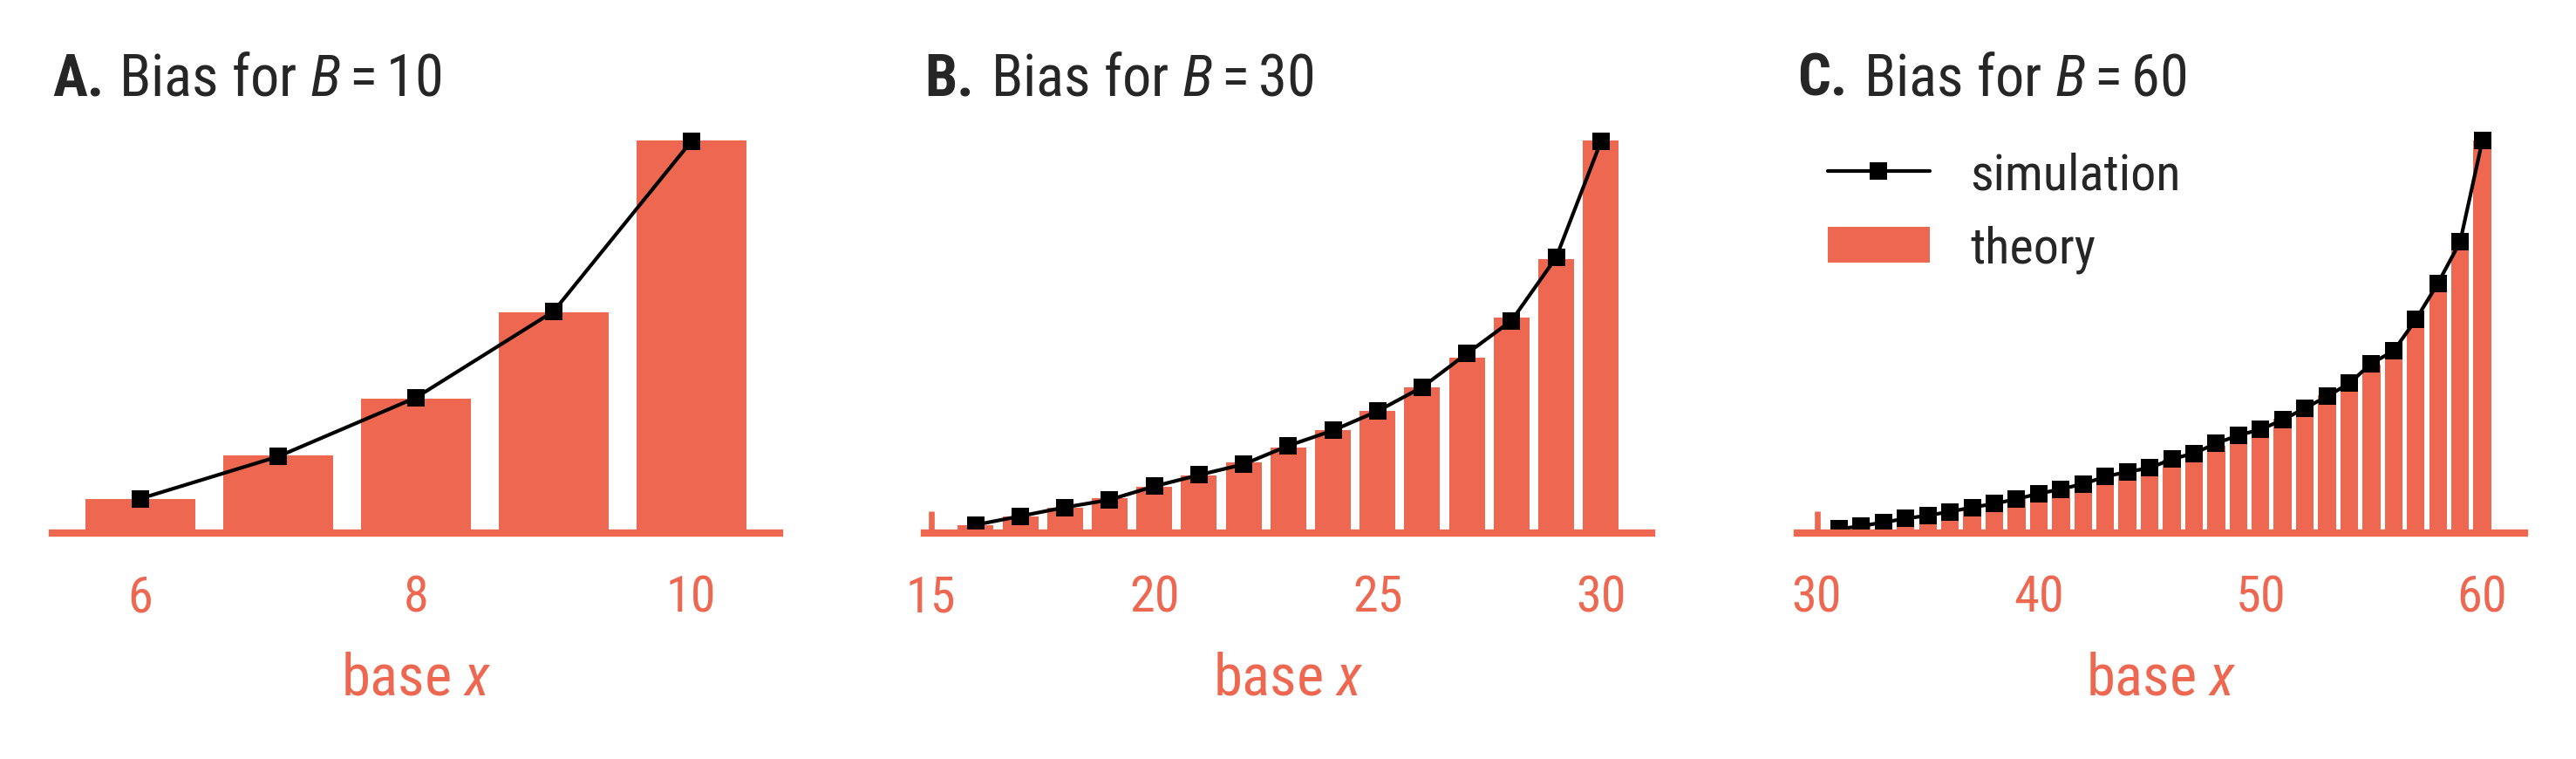

In [6]:
figure(figsize=cm2inch(12,2))

def show_simulation(B): 
    s = sample(100000, B)
    counts, xs = np.histogram(s, bins = int(B/2), range=(int(B/2)+1, B+1))
    ps = counts/counts.sum()
    plot(xs[:-1], ps, 'ks-', lw=.5, ms=2.5, label='simulation')

def show_dist(B):
    xs = arange(B/2+1, B+1)
    ps = [prob(x, B) for x in xs]
    pyplot.bar(xs, ps, color=get_color('orange'), label='theory')
    yticks([])
    title(f'Bias for $B={B}$')
    xlabel(f'base $x$')    
    show_simulation(B)

    
ax1 = subplot(131)
show_dist(10)

ax2 = subplot(132)
show_dist(30)

ax3 = subplot(133)
show_dist(60)

restyle_title(ax1, ax2, ax3)
sns.despine(left=True)
legend()
subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('FIG10-base-game-bias.pdf', bbox_inches='tight')
copyfig('FIG10-base-game-bias.pdf')